# Description:Linear regression


Given y = mx+c where m is slope and c is intercept
obj: is to find a best fit line with given x and y values. we can have multiple number of best fit lines but the one which gives minimum error(the distance between predicted values(lie on the line) and true values) is the best fit line.
Objective is to reduce the value of cost function.
cost function = 1/2m * sum(y^ - y)**2

Given x and y vales: if you want to draw a line(y=mx+c),fix c=0 and let m=1..so y = x
x:1,2,3
y:1,2,3
cost function = 1/(2*3) * ((1-1)^2 + (@-2)^2 +(3-3)^2 +(4-4)^2) = 0....for m=1

if m=0.5
cost function = 0.58
Question: At which value of 'm', should I stop the iterations?
    Ans: At the global minimum point where slope=0, from Convergence theorem.
        m = m - (del(m)/der(m)) * alpha(learning rate)
        
To find error: 
    Use RMSE,Absolute error, MSE

# Note: 
    linearity: the relation between X and mean of y is linear
    homoscedacity: error term is same for any value of x(Across all independent values)
    independence: observations are independent on each other.
    normality: y is normally distributed for values of x
Advantage
    Performs well on linear/y separable points
    easy to implement
    can handle overfitting by using dimensional reduction techniques and regularization
Disadvantage
    Do not do well when there is multi-collinearity in features
    Sometimes Lot of Feature Engineering is required
    needs hyper-parameter tuning:lasso and ridge regression

        
    

In [1]:
import numpy as np
import pandas as pd

In [52]:
file = pd.read_csv(r"C:\Ecommerce_Customers.csv")

In [53]:
file.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021595,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [54]:
file.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [55]:
Y=file['Yearly Amount Spent']
X = file.drop('Yearly Amount Spent',axis=1)

In [56]:
X.shape

(500, 7)

In [57]:
Y.shape

(500,)

In [58]:
X.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership'],
      dtype='object')

In [59]:
Y.shape, X.shape

((500,), (500, 7))

In [60]:
file.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

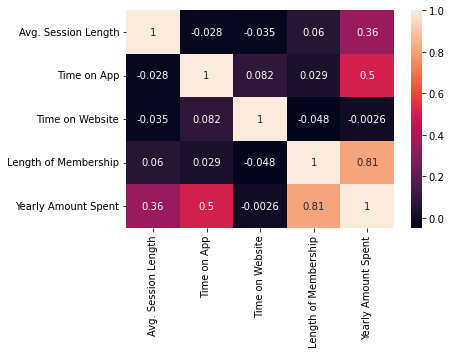

In [61]:
import seaborn as sns
sns.heatmap(file.corr(), annot=True)

In [62]:
file.isnull().any()

Email                   False
Address                 False
Avatar                  False
Avg. Session Length     False
Time on App             False
Time on Website         False
Length of Membership    False
Yearly Amount Spent     False
dtype: bool

In [63]:
X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')

In [64]:
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

In [66]:
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size=0.4, random_state=10)

In [67]:
lm = LinearRegression()

In [68]:
lm.fit(x_train,y_train)

LinearRegression()

In [69]:
prediction = lm.predict(x_test)

Text(0, 0.5, 'prediction')

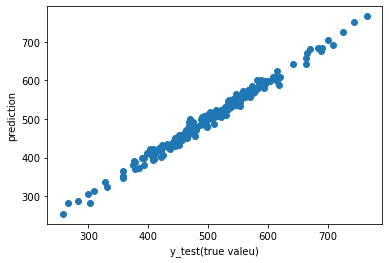

In [72]:
import matplotlib.pylab as plt
plt.scatter(y_test,prediction)
plt.xlabel('y_test(true valeu)')
plt.ylabel('prediction')

In [73]:
#evaluate matrix
from sklearn import metrics


In [74]:
print('MAE', metrics.mean_absolute_error(y_test, prediction))

MAE 7.918349539335306
